<a href="https://colab.research.google.com/github/guilhermelaviola/ApplicationOfDataScienceForBusiness/blob/main/Class13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation with Data Science**
Customer segmentation is a strategic approach that divides customers into distinct groups based on shared characteristics such as demographics, behavior, and interests, enabling companies to personalize marketing, improve products and services, enhance customer support, and increase profitability. Rather than applying a one-size-fits-all strategy, businesses can tailor their efforts to meet the specific needs of each segment. Machine learning techniques like K-Means, DBSCAN, and Hierarchical Clustering are widely used for this purpose, as they analyze large datasets to identify meaningful patterns and clusters. The choice of algorithm depends on the dataset and business objectives, and data normalization is essential to ensure fair variable contribution during clustering. In practice, tools such as Python and libraries like SKLearn, Pandas, and Matplotlib are commonly used to implement, analyze, and visualize segmentation models. Overall, machine learning-driven customer segmentation helps organizations better understand their customers and design more targeted and effective strategies.

In [20]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
# Generating fictional data for study:
data = {
    'Age': [25, 34, 45, 31, 40, 23, 35, 50, 43, 52, 28, 55, 44, 68, 74, 67, 42],
    'Annual income (USD)': [15, 25, 35, 45, 50, 55, 60, 70, 80, 90, 20, 100, 75, 64, 62, 51, 33],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 50, 60, 38, 27, 45, 49, 79]
}

# Creating a DataFrame with the data above:
df = pd.DataFrame(data)

# Normalizing the data:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## **Example: K-Means**
The K-Means algorithm is one of the most popular clustering methods. Unlike other machine learning algorithms we've seen previously, such as linear regression or decision trees, which require a priori classification, K-Means automatically clusters data based on the similarities present in the dataset.

In [22]:
# Applying K-Means:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Adding the 'Cluster' column to the DataFrame:
df['Cluster'] = clusters

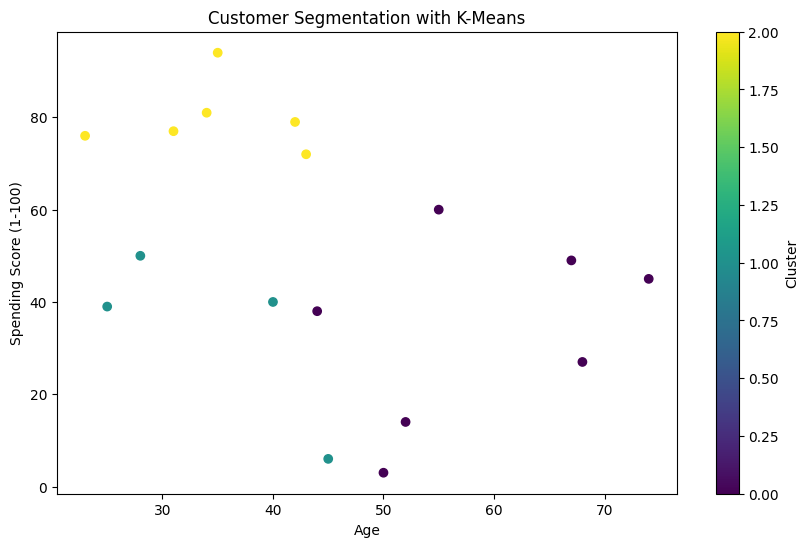

In [23]:
# Displaying the clusters:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation with K-Means')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

## **Example: DBSCAN**
DBSCAN is a density-based clustering algorithm that is particularly useful when data is noisy or has a non-spherical distribution. It identifies clusters as high-density regions separated by low-density regions. One of DBSCAN's major advantages is that it doesn't require a predefined number of clusters, unlike K-Means.

In [24]:
# Applying DBSCAN:
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(scaled_data)

# Adding the 'Cluster' column to the DataFrame:
df['Cluster'] = clusters

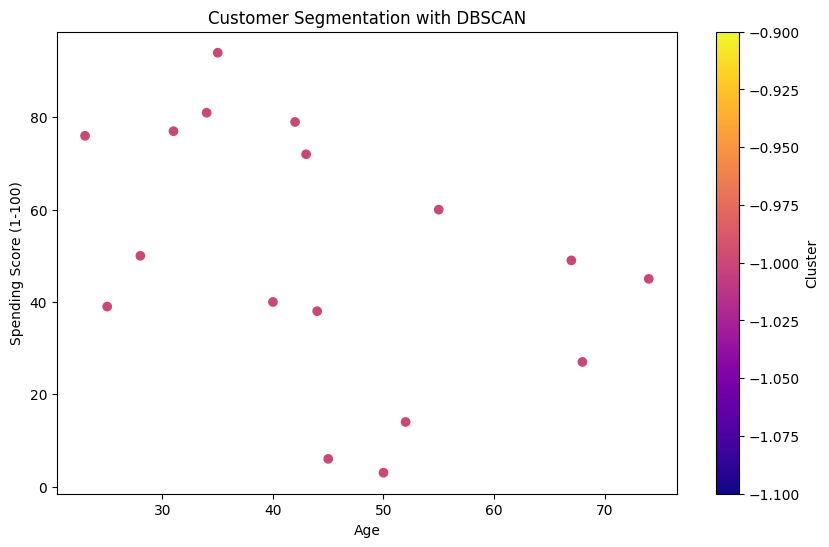

In [25]:
# Displaying the clusters:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='plasma')
plt.title('Customer Segmentation with DBSCAN')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

## **Example: Hierarchical Clustering**
Hierarchical Clustering creates a hierarchy of clusters, where each observation begins as an individual cluster, and clusters are repeatedly combined based on some measure of proximity. This method can be represented by a dendrogram, which visualizes the union of clusters at different levels of similarity.

In [26]:
# Applying Hierarchical Clustering:
linked = linkage(scaled_data, method='ward')

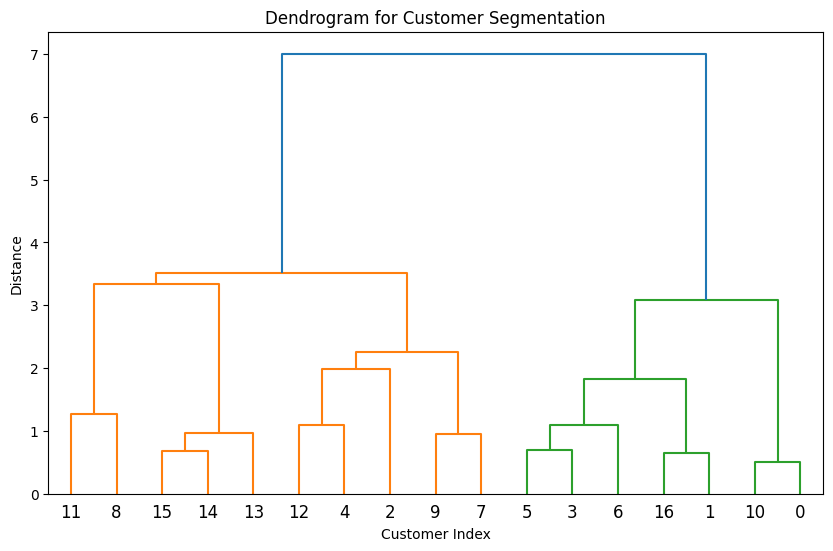

In [27]:
# Plotting the dendrogram:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Customer Segmentation')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()